Problem statement:-
    Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#Importing required libraries

import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import xgboost as XGB


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv ")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Cheking the first five line and last five line of entire data set comprises of 1470 rows and 35 columns.The column 

'Attrition' is our label that need to be predicted in assisting the HR professionals to understand what causes attrition 

in an organization and help them with retention process. Apart from the Attrition column right now all the remaining columns 

are our features that we will be using in generate our prediction.Since our lable column is based upon binary classes 

this become a classification problem.

# Exploratory data analysis

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 column that have object data type columns

so that our machinlearning model can understand the data since the acceptance of numerical data is mandatory

In [6]:
df.nunique().to_frame("unique values")

,unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


We are checking the total number of unique values present in each column be it categorical or numerical data

In [7]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of describe method in transpose format we are able to take a look at our column details clearly.

The count column once again confirm that there is no missing data concern in our dataset.

How ever if we check the min column we notice the colums with zero as their values.

with the above we got only numerical data type and object datatype has been ignored

In [9]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

Droping unwandted columns after carefull observation

In employee count all columns filled with '1' so i consider it as unnecessary

Employee no is unique no provided by the company to all its employees so i deleted it

Over18 - As per labour law only over 18 age people can take into services it is nothing more than it showing

Standard hours - standard hours for all is 80 hours there is no partiallity here so it is also un necessary deleted it

# Separating Object data type and Integer datatype columns

In [10]:
Obj_dtype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        Obj_dtype.append(x)
Obj_dtype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

# Here we have 8 column with object data type we have to encode them before model buliding

In [11]:
Integer_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        Integer_datatype.append(x)
Integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

we have 23 numericaldata type columns for which need to include in Model buliding

# Visual Representation

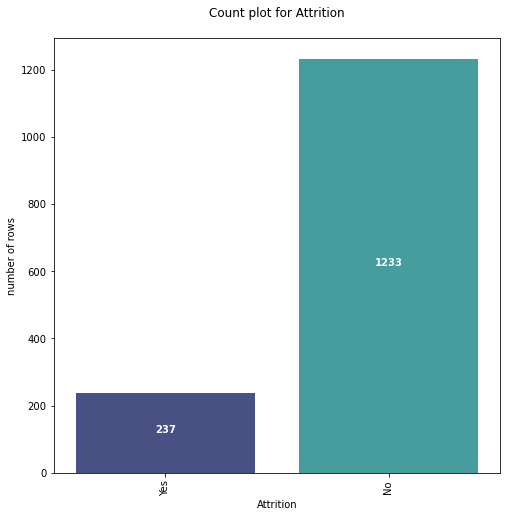

In [12]:
plt.figure(figsize=(8,8))
col_name='Attrition'
values = df[col_name].value_counts()
index=0
ax =sns.countplot(df[col_name],palette="mako")
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],horizontalalignment='center',fontweight='bold',color='w')
    
    index+=1
    
plt.title(f'Count plot for {col_name}\n')
plt.ylabel(f'number of rows')
plt.xticks(rotation=90)
plt.show()

With the above graph the target variable is imbalanced

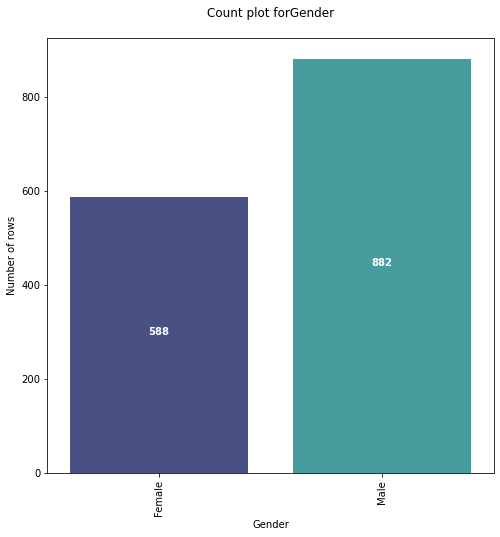

In [13]:
plt.figure(figsize=(8,8))
col_name='Gender'
values = df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')
for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight='bold',color='w')
    index +=1

plt.title(f"Count plot for{col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

The male no of employees are higher than female, generally in india all organizations are like this.

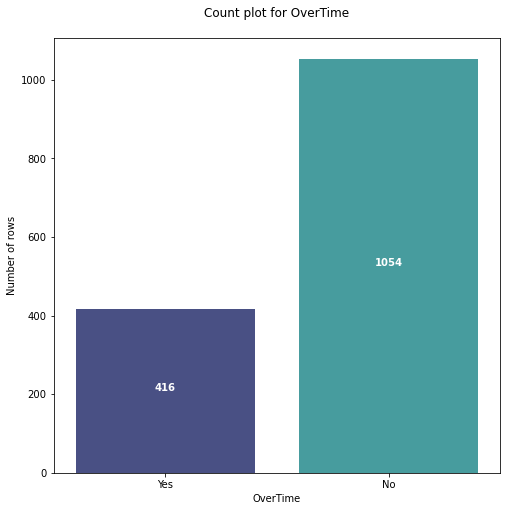

In [14]:
plt.figure(figsize=(8,8))
col_name='OverTime'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

With the above graph we can understand that less no of people doing overtime remaining not prefering overtime

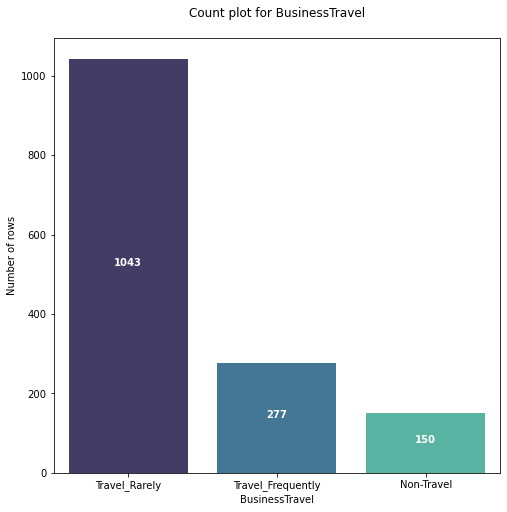

In [15]:
plt.figure(figsize=(8,8))
col_name='BusinessTravel'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

With the above graph we can understand that huge no of employees travel rarely and less no of employees not travelling

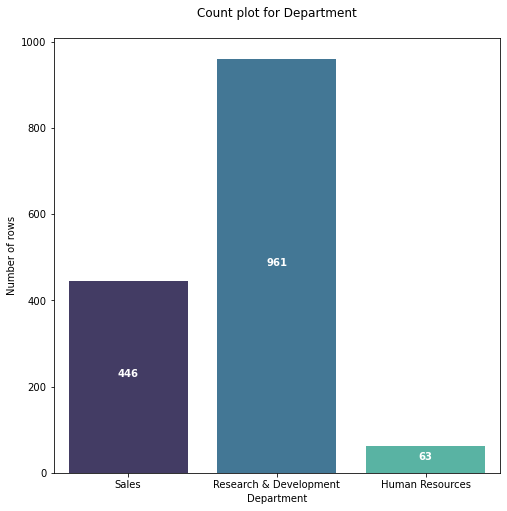

In [16]:
plt.figure(figsize=(8,8))
col_name='Department'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

with the above diagram we can understand that in R&B there is huge no of employees and in HR department less no of employees

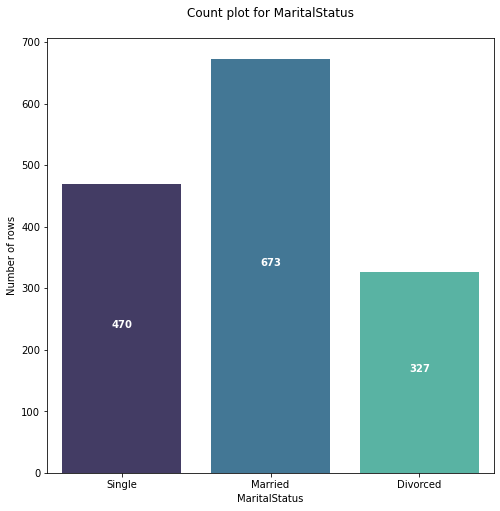

In [17]:
plt.figure(figsize=(8,8))
col_name='MaritalStatus'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

With the above diagram we can understand that Married employees are high in number and divorced employees are low in no.

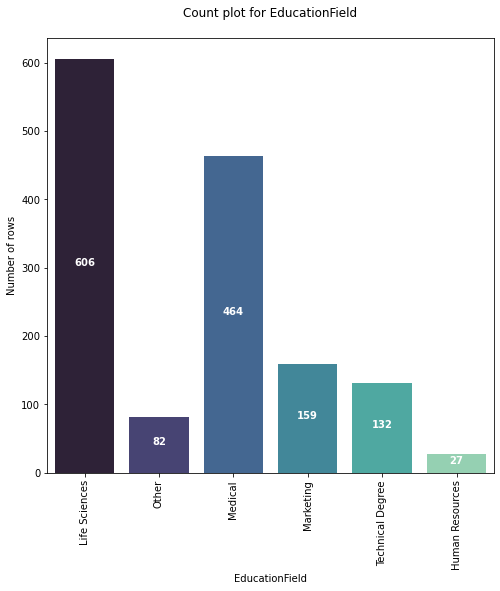

In [18]:
plt.figure(figsize=(8,8))
col_name='EducationField'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

with the education field column we can understood that no of employees with lifesciences graduates in high and with Hr is low

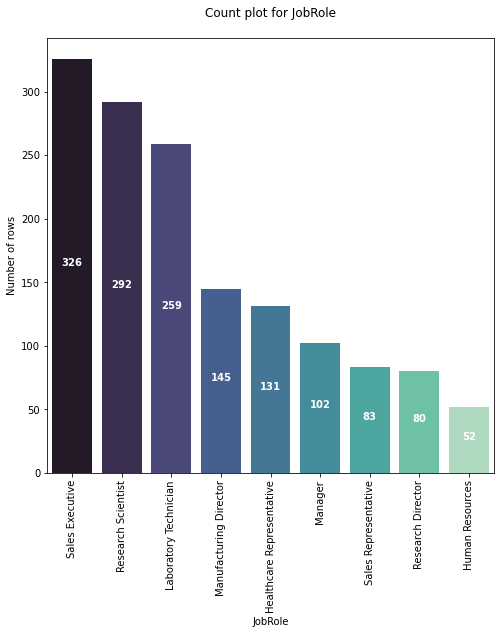

In [19]:
plt.figure(figsize=(8,8))
col_name='JobRole'
values=df[col_name].value_counts()
index=0
ax=sns.countplot(df[col_name],palette='mako')

for i in ax.get_xticklabels():
    ax.text(index,values[i.get_text()]/2,values[i.get_text()],
            horizontalalignment='center',fontweight ='bold',color='w')
    index +=1
    
plt.title(f"Count plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

With the above graph we can understand that sales executives are high in no which do job directly with clients

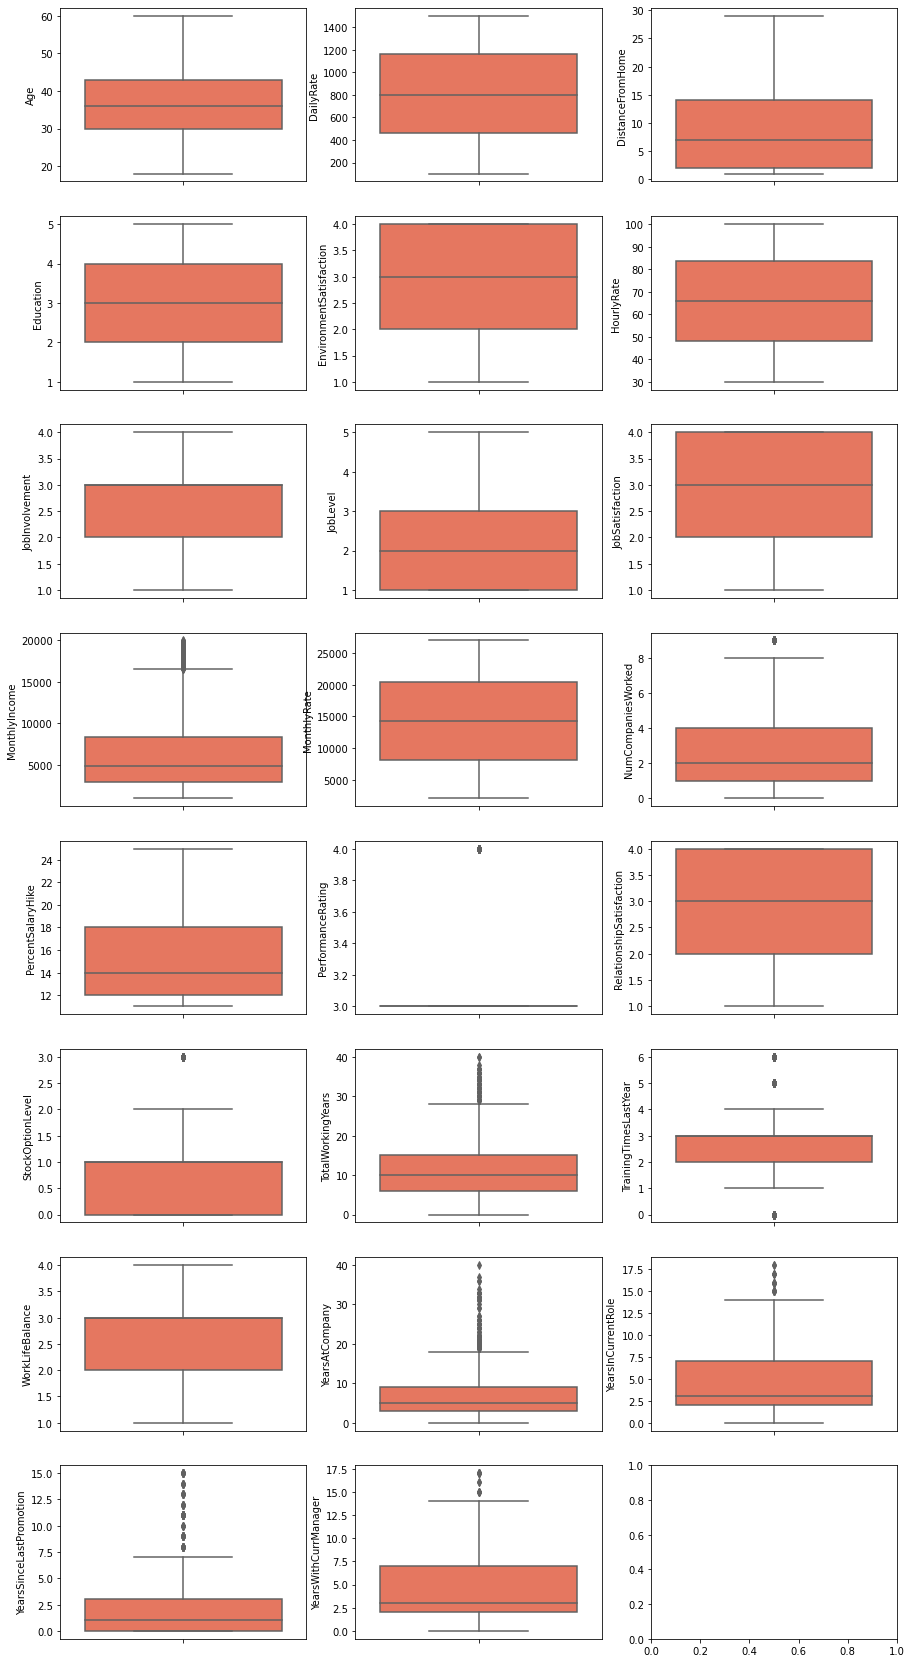

In [20]:
fig, ax=plt.subplots(ncols=3,nrows=8,figsize=(15,30))
index=0
ax=ax.flatten()
for col,value in df[Integer_datatype].items():
    sns.boxplot(y=col,data=df,ax=ax[index],palette='Reds')
    index +=1
    
plt.show()

We created box plots for all interger columns the columns which are showing outliers need to be treat them accordingly

*MonthlyIncome

*No of companies worked

*PerformanceRating

*StockOptionlevel

*TotalWorking years

*TrainingTimesLastYear

*Years at company

*Years in current role

*Years since last promotion

*Years with current manager

All the above columns showing visible outliers

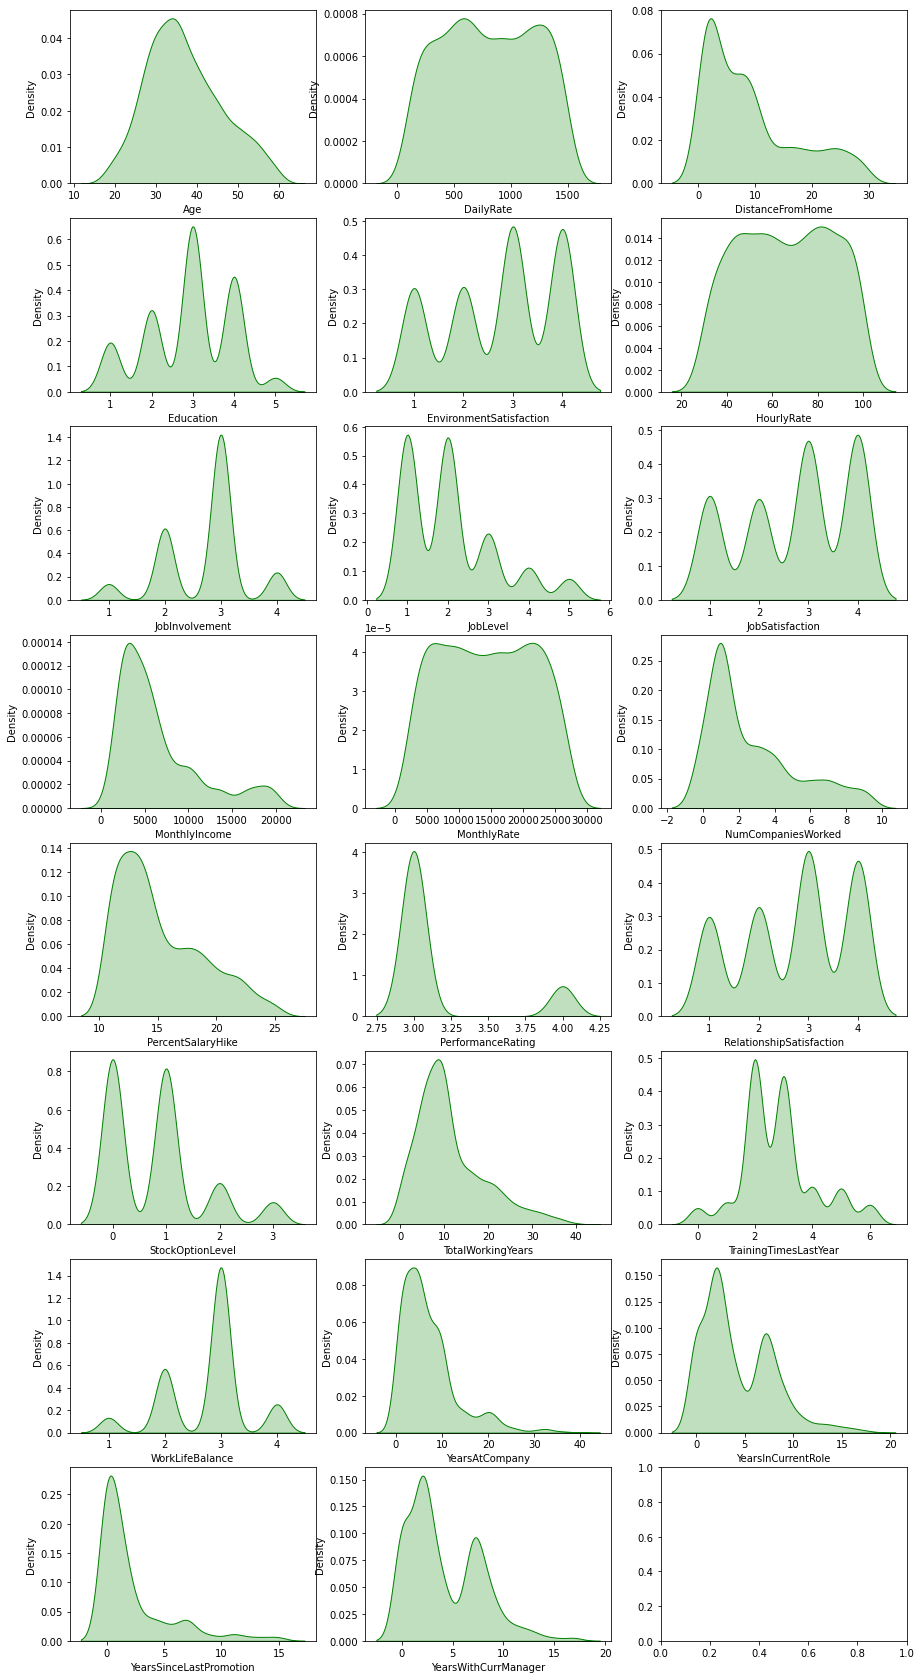

In [21]:
fig,ax=plt.subplots(ncols=3,nrows=8,figsize=(15,30))
index=0
ax=ax.flatten()
for col,value in df[Integer_datatype].items():
    sns.distplot(value,ax=ax[index],hist=False,color='g',kde_kws={'shade':True})
    index +=1
plt.show()

With the help of above graph we can identify that there is some skewness in some columns we have to treat them accordingly

Columns showing most skewness:
    
    1)Distance From Home
    
    2)Monthly Incom
    
    3)Num of companies worked
    
    4)Percent salary Hike
    
    5)Total working years
    
    6)Training times lastyear
    
    7)Years at company
    
    8)Years in current role
    
    9)Years since last promotion
    
    10)Years with current manager


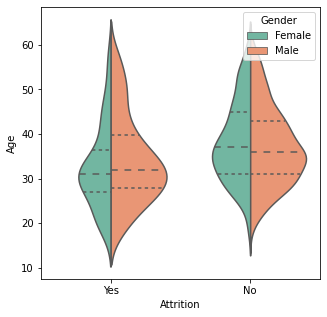

In [22]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Attrition',y='Age',hue='Gender',data=df,palette='Set2',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can understand that Attrition rate is very high where the mid age in between 20 to 30 for both male and female

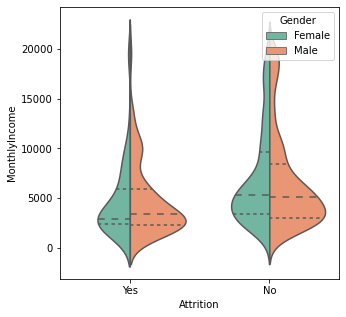

In [23]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df,palette='Set2',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can understand that Attrition rate is peaks whose monthly income is below 5000/- in male and female

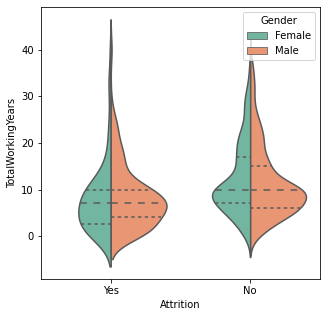

In [24]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Attrition',y='TotalWorkingYears',hue='Gender',data=df,palette='Set2',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can under stand that Attrition rate is very high in both male and female with workexperience in between 1-10 years

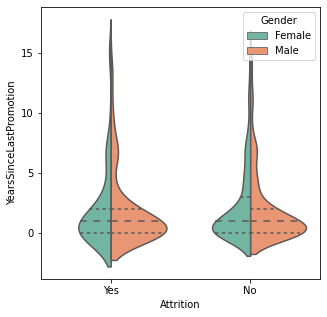

In [25]:
plt.figure(figsize=(5,5))
sns.violinplot(x='Attrition',y='YearsSinceLastPromotion',hue='Gender',data=df,palette='Set2',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can understand that after many years of work experience who have not got promoted their attrition is high in both male and female

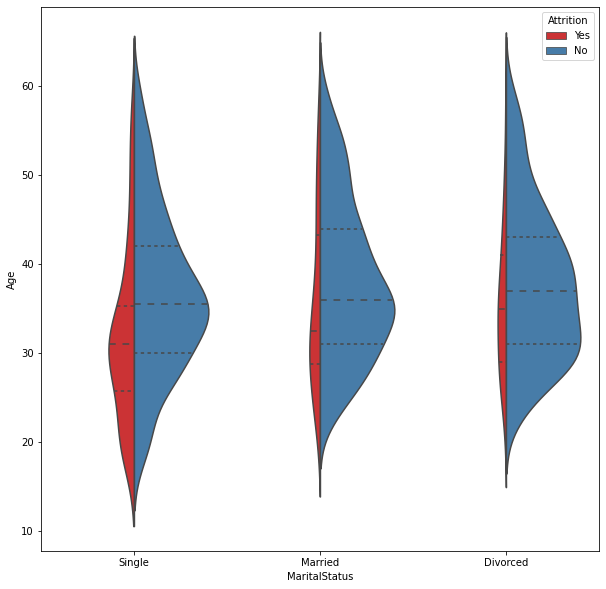

In [26]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MaritalStatus',y='Age',hue='Attrition',data=df,palette='Set1',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can understand that Attrition rate is very high in singles as compared to married and divorced as their resposiblities are less according to their age

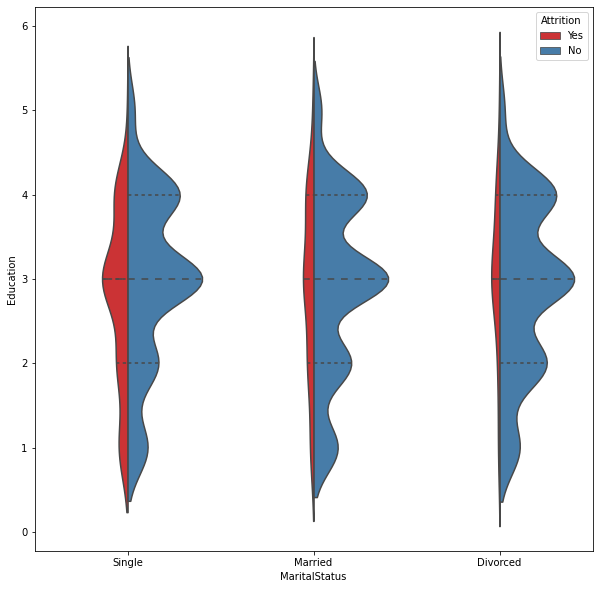

In [27]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MaritalStatus',y='Education',hue='Attrition',data=df,palette='Set1',split=True,scale='count',inner='quartile')
plt.show()

With the above graph we can notice that married and divorced with good qualification choose stability in their life as compare to single why because of they can able to take risk according to their age and less responsibilities

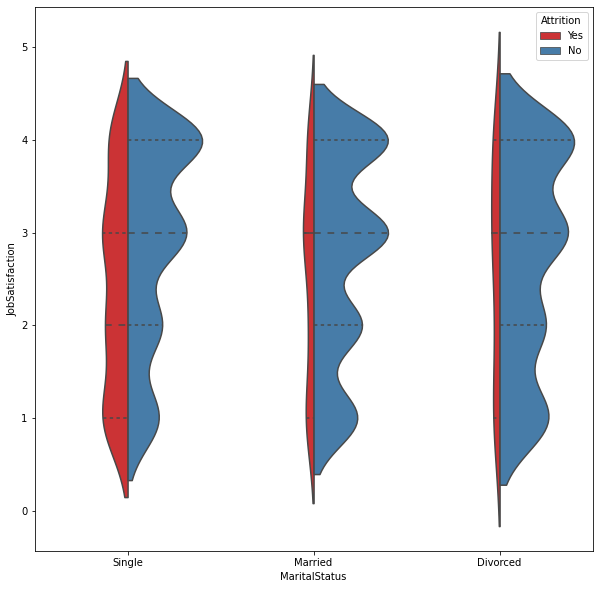

In [28]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MaritalStatus',y='JobSatisfaction',hue='Attrition',data=df,palette='Set1',split=True,
               scale='count',inner='quartile')
plt.show()

With the above plot we can notice that Jobsatisfaction is less as for singles as compared to married and divorced why because less years of exprience

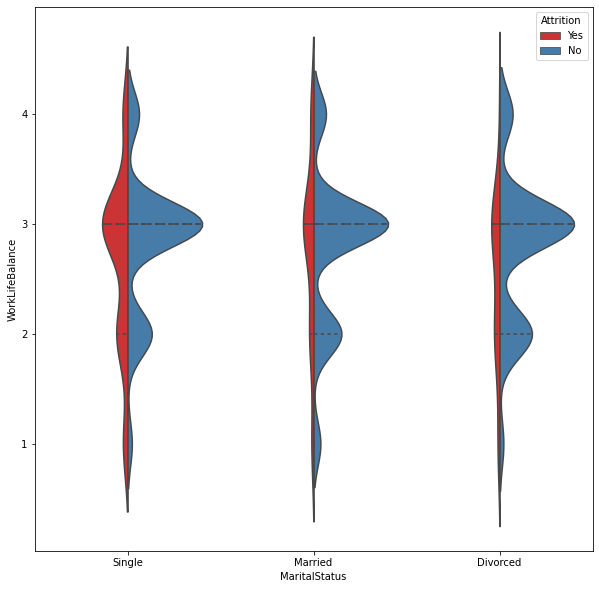

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MaritalStatus',y='WorkLifeBalance',hue='Attrition',data=df,palette='Set1',split=True,
               scale='count',inner='quartile')
plt.show()

With the above plot we can understand that work life balance maintained by singles very less as compared to married and divorced,hence attritions observed as they have to achieved lot of skills toget better in their career

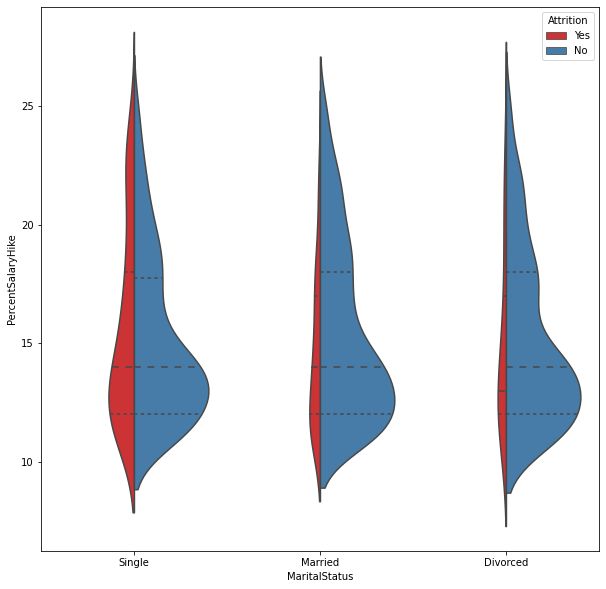

In [30]:
plt.figure(figsize=(10,10))
sns.violinplot(x='MaritalStatus',y='PercentSalaryHike',hue='Attrition',data=df,palette='Set1',split=True,
               scale='count',inner='quartile')
plt.show()

With the above plot we can see that the Percent Salary Hike plays a major role when it comes to Attrition amongest the singles
as compared to their married or divorced counterparts

# Encoding the Object data typed columns

In [31]:
#Label Encoder

le=LabelEncoder()
le.fit(df['Attrition'])
le.classes_
pd.Series(le.transform(df['Attrition'])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

We are using Label encoder on our target variable this will convert our object datatype target column to numerical 

In [32]:
df["Attrition"]=le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


With the above we can understood that our Attrition column successfully converted to numerical column ie 0,1

In [33]:
# Using Ordinal Encoder on remaining Categorical columns converting object to numarical type

oe=OrdinalEncoder()
df['BusinessTravel']=oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department']=oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField']=oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender']=oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole']=oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus']=oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime']=oe.fit_transform(df['OverTime'].values.reshape(-1,1))

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


#Hence We converted all columns to numerical data types for model building

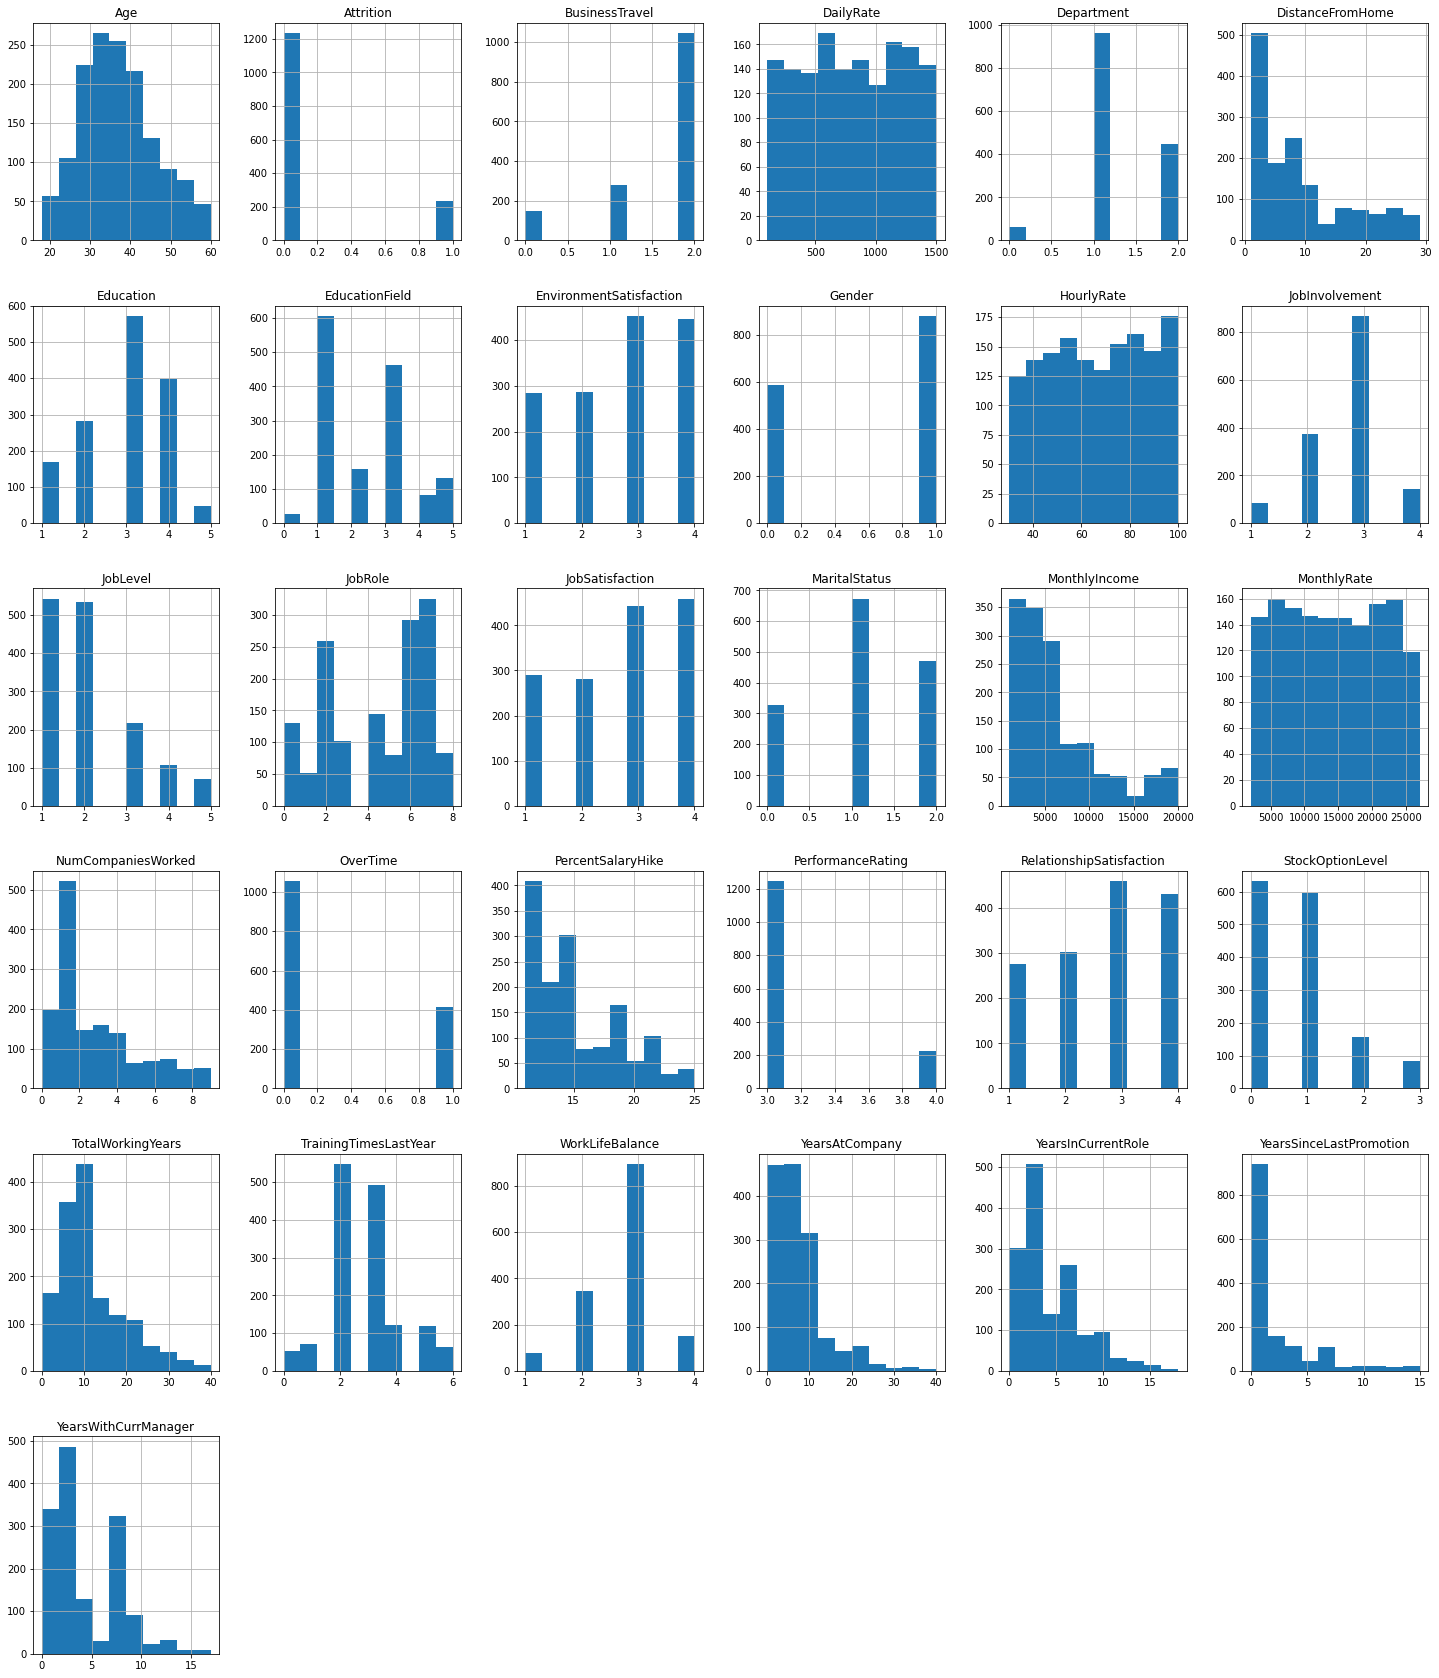

In [35]:
df.hist(figsize=(25,30))
plt.show()

With the above histogram  we can plot all columns so there is no object data type columns anymore

# Finding correlation using Heatmap



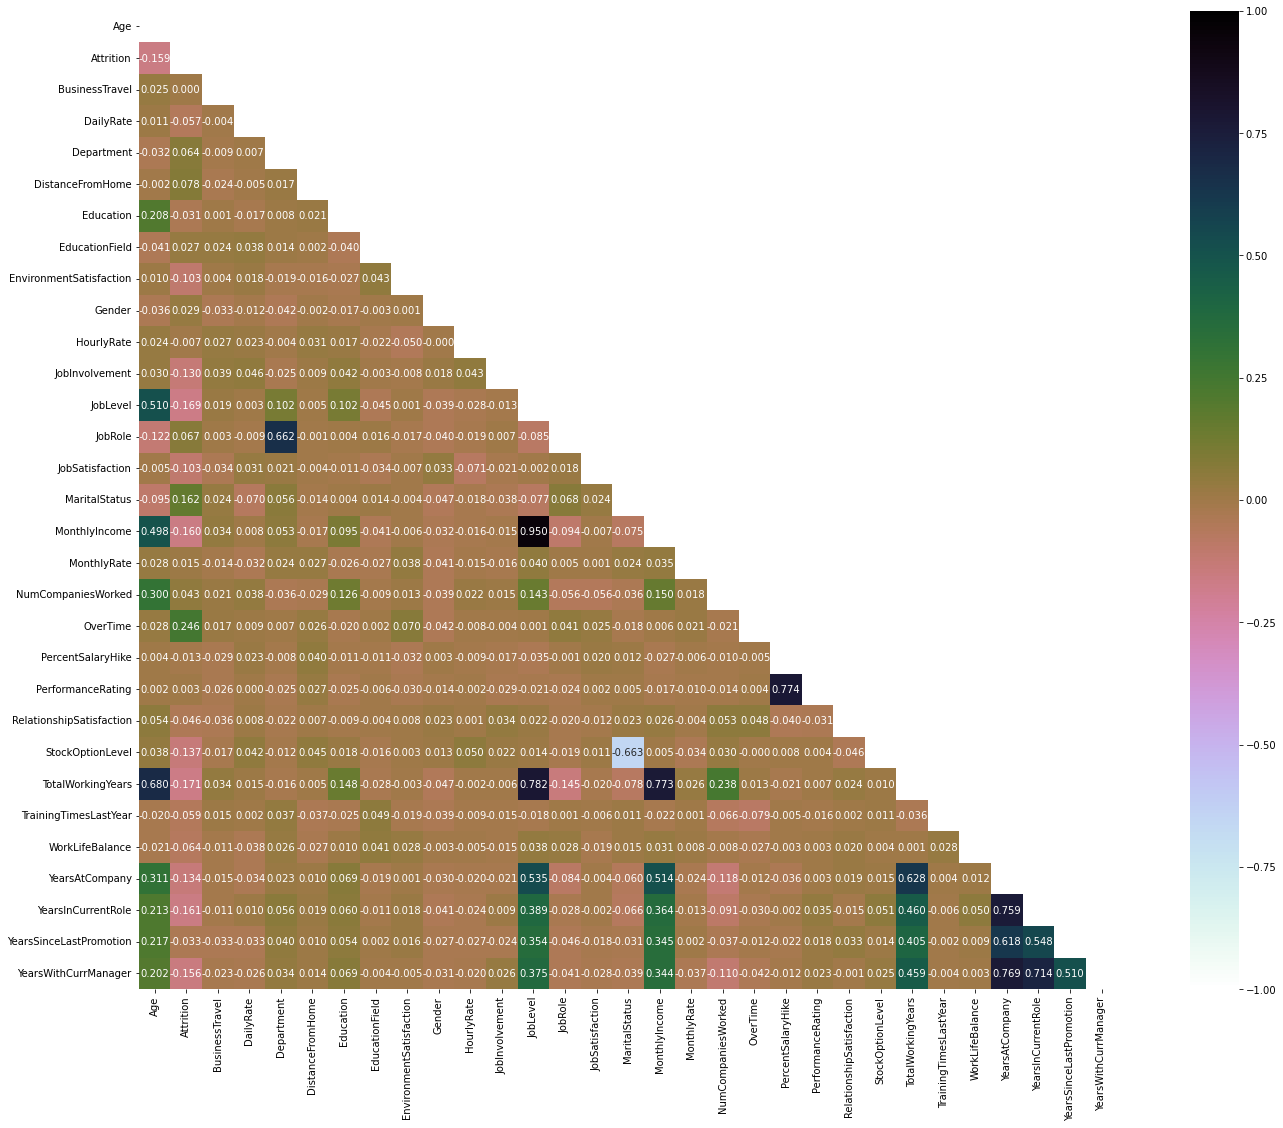

In [36]:
# A correlation of +1 indicates positive correlation , meaning that both variables move in same direction together

# A correlation of -1 indicates negative correlation, meaning that both variable move in opposite direction

upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,square=True,fmt='0.3f',
           annot_kws={'size':10},cmap="cubehelix_r",mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

With the above heatmap we can see that our target variable "Attrition" has both positive and negative correlations with the feature columns.

# Correlation bar plot comparing features with our labels

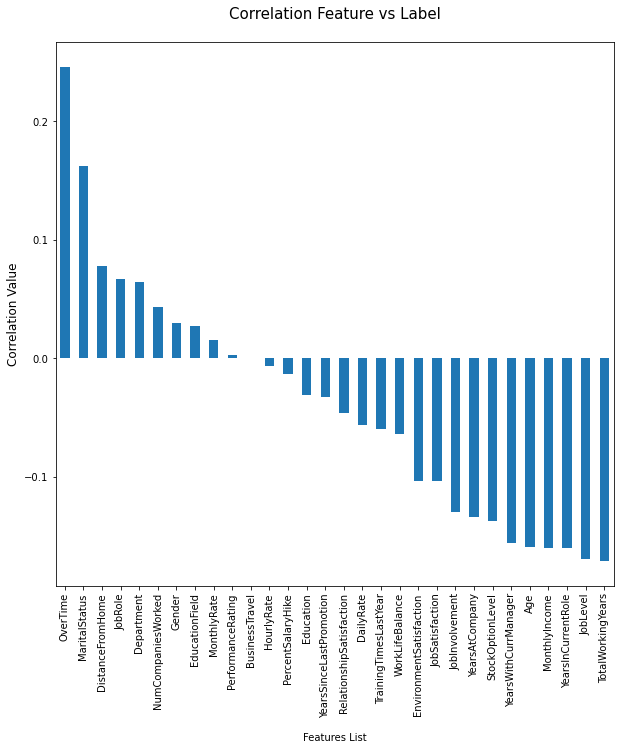

In [37]:
df_corr=df.corr()
plt.figure(figsize=(10,10))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation Feature vs Label\n",fontsize=15)
plt.xlabel("\nFeatures List")
plt.ylabel("Correlation Value",fontsize=12)
plt.show()

With the above bar plot we can clearly identify that all feature  columns which are positively correlated and which are negatively correlated with our label

# Using Z-socre method to remove outliers

In [38]:
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

print("Shape of the DataFrame before removing outliers:",df.shape)
print("Shape of the DataFrame after removing outliers: ",df1.shape)
print("Percentage of data lost post outlier removal: ",(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()
# Re-assigning the changed dataframe name to our original dataframe

Shape of the DataFrame before removing outliers: (1470, 31)
Shape of the DataFrame after removing outliers:  (1387, 31)
Percentage of data lost post outlier removal:  5.646258503401361


We have used z - score method to remove outlier hence in IQR method the data loss % is 10 where i can't afford that much data loss 

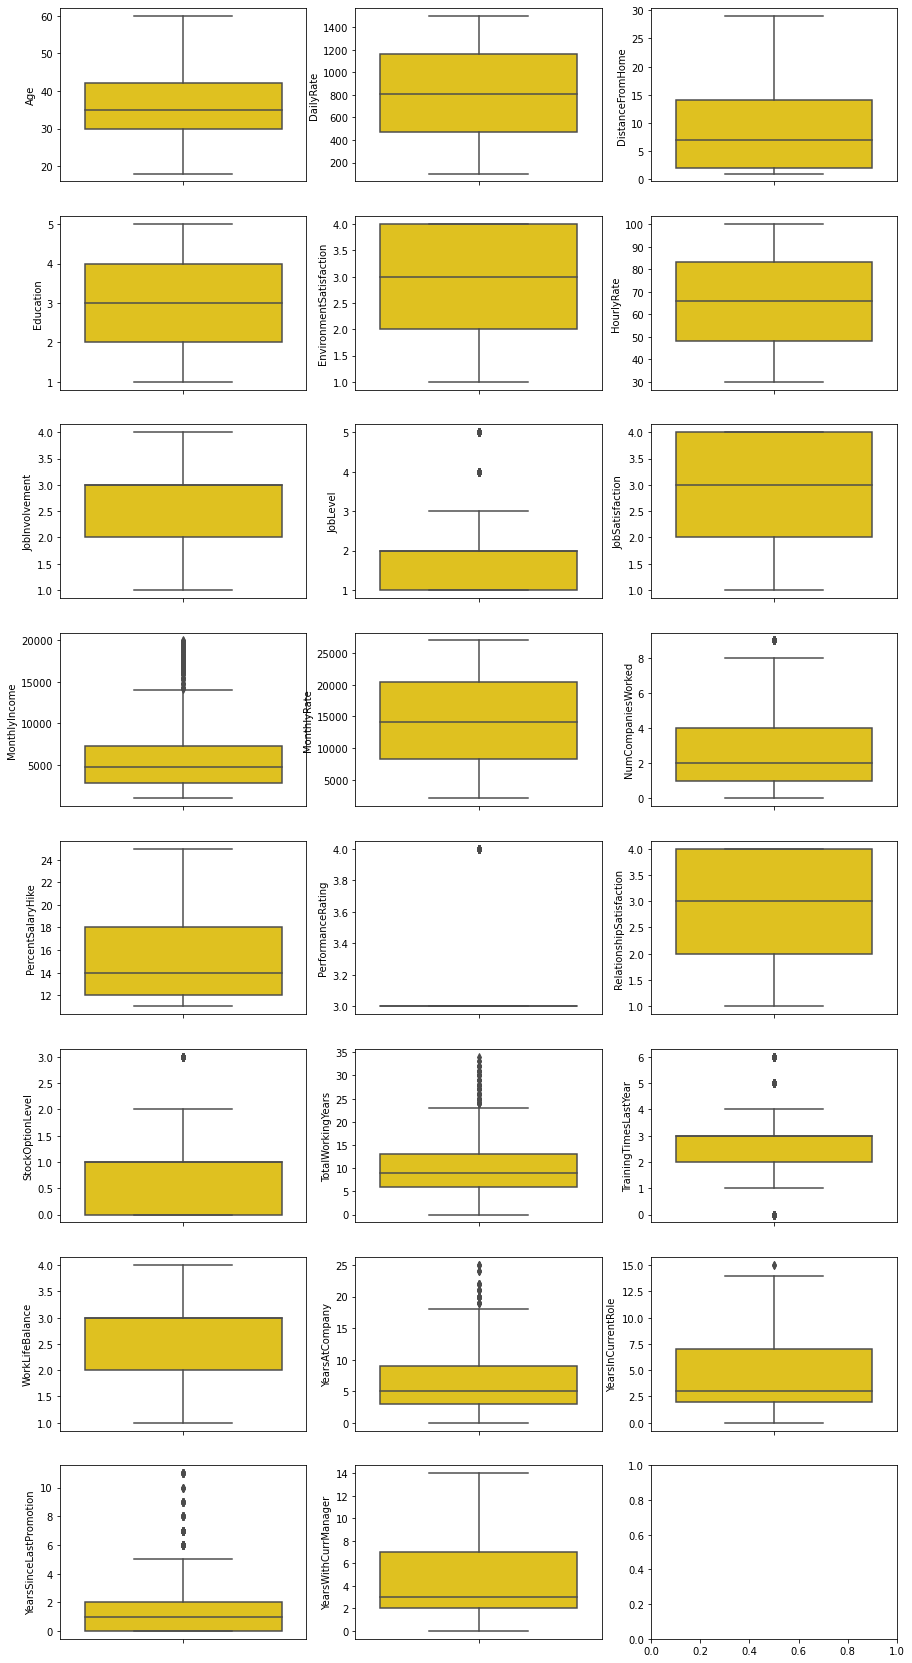

In [39]:
fig,ax=plt.subplots(ncols=3,nrows=8,figsize=(15,30))
index=0
ax=ax.flatten()
for col,value in df [Integer_datatype].items():
    sns.boxplot(y=col,data=df,ax=ax[index],palette="prism")
    index +=1
plt.show()

With the above box plot we can see that whatever outliers we could have efforeded to lose from our numerical columns we have get ridden of it

There are some more outliers present in data hence they are continues in nature we can ignore them

df.skew()

With the checking skewness of data we can identify that 3 columns skewness is very high hence they are more than acceptable level ie.+/-0.5 value

# Using log transformation method to fix the skewness

In [40]:
for col in Integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Applied log transformation on integer datatype hence we have to check skewness present in dataset or not

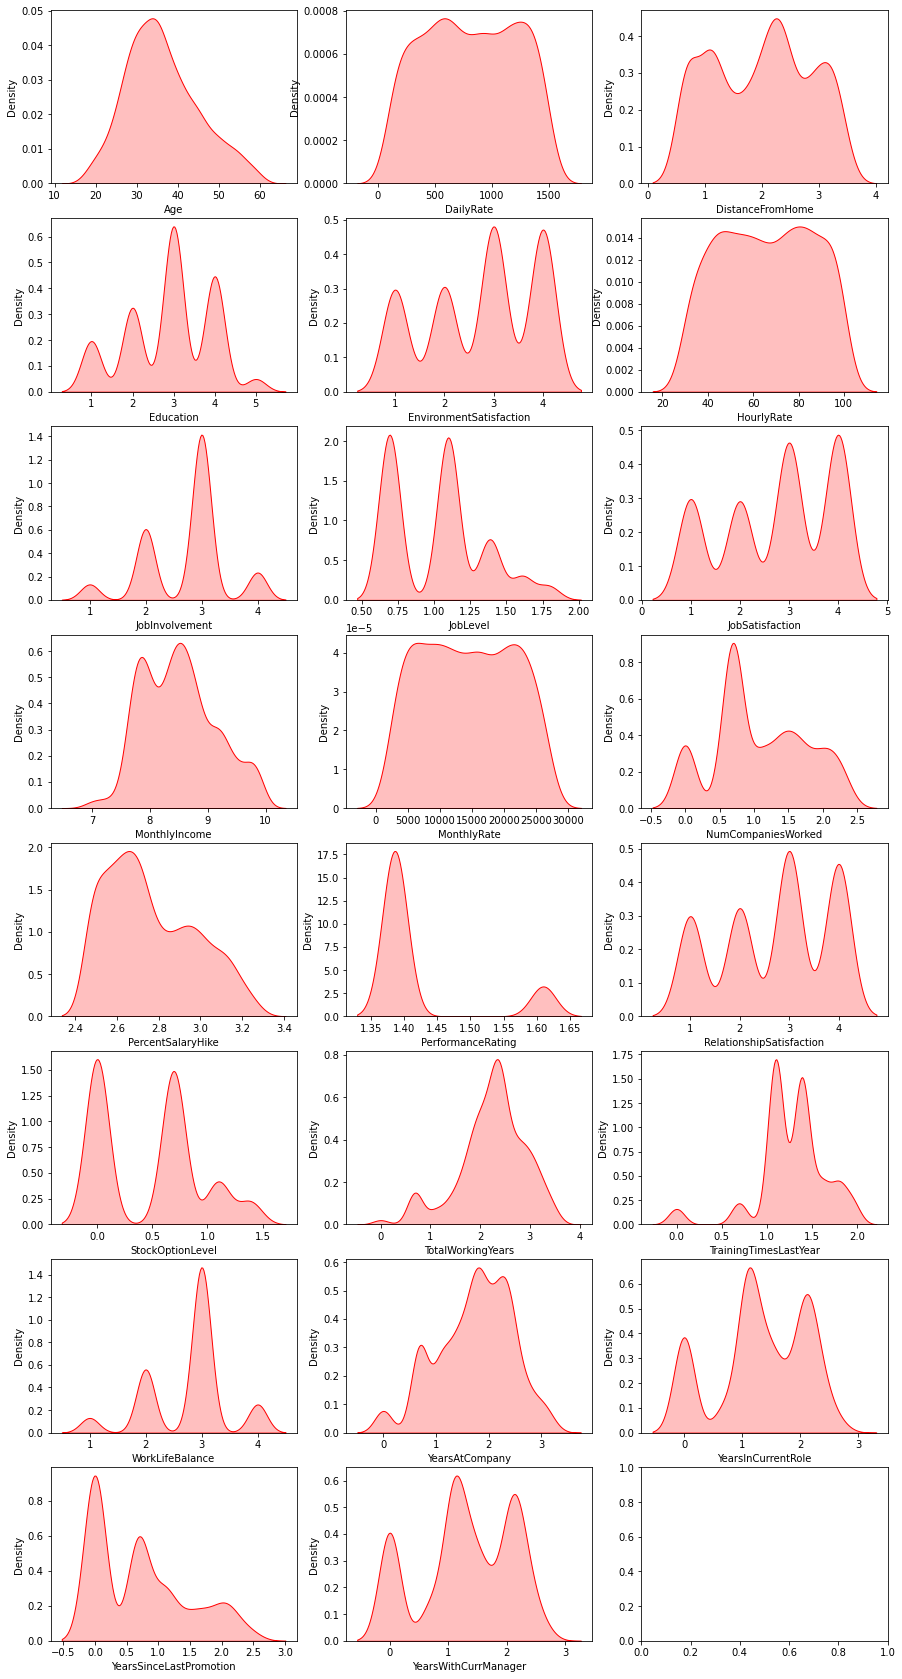

In [41]:
fig,ax=plt.subplots(ncols=3,nrows=8,figsize=(15,30))
index=0
ax=ax.flatten()
for col,value in df[Integer_datatype].items():
    sns.distplot(value,ax=ax[index],hist=False,color='r',kde_kws={'shade':True})
    index +=1
plt.show()

# Splitting dataset in to X and Y variable ie. features and label

In [42]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

# Resolving the class imbalance issue in the target column

In [43]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

 We can fix the imbalance in datset through Over sampling method

In [44]:
#Adding samples to make all the categorical quality values same

oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [45]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

After oversampling we once again Cheking  the Label weather it was balanced or not, it was balanced hence we can go for model building so that ML model will not be biased now.

# Applying standard scaler

In [46]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.726732,0.656804,0.822283,1.403652,-1.699753,-0.758627,-1.031793,-0.442920,-1.366397,1.498673,...,-0.467857,-1.422442,-0.943399,0.173982,-3.498387,-2.175203,0.503569,0.573599,-0.986050,0.833909
1,1.658817,-1.024574,-1.287976,-0.570552,0.203451,-1.794583,-1.031793,0.487092,0.843085,-0.250065,...,2.490438,1.424901,0.663927,0.466688,0.383754,0.561972,1.159463,1.199239,0.018557,1.206631
2,0.260690,0.656804,1.517155,-0.570552,-1.186692,-0.758627,1.359429,1.417105,0.843085,1.392689,...,-0.467857,-0.473328,-0.943399,0.002180,0.383754,0.561972,-2.320221,-1.568784,-0.986050,-1.487505
3,-0.205352,-1.024574,1.565873,-0.570552,-0.822670,1.313284,-1.031793,1.417105,-1.366397,-0.515025,...,-0.467857,0.475787,-0.943399,0.173982,0.383754,0.561972,0.868262,1.199239,1.023165,-1.487505
4,-0.904416,0.656804,-0.487975,-0.570552,-1.186692,-1.794583,0.562355,-1.372933,0.843085,-1.362898,...,-0.467857,1.424901,0.663927,-0.192594,0.383754,0.561972,-0.725980,-0.106380,0.606215,-0.064136


# Finding the best Random state to build best regression models

In [47]:
maxAccu=0
maxRs=0

for i in range(1,1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc_score=(accuracy_score(y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRs=i
        
print("Best Accuracy score is",maxAccu,"on Random State",maxRs)

Best Accuracy score is 89.22413793103449 on Random State 989


# Creating training and test datasets

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=989)

We are condsidering 25% data for training purpose and 75% data for testing purpose and considering 989 as random state for model building

In [49]:
#Classification model Building

def classification(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=989)
    
    #Model training
    model.fit(X_train,y_train)

    #y_test prediction
    pred=model.predict(X_test)
    
    #Accuracy score
    acc_score=(accuracy_score(y_test,pred))*100
    print("Accuracy score: ",acc_score)
    
    #Classification report
    class_report = classification_report(y_test,pred)
    print("\nClassification report: \n",class_report)
    
    #Cross validation score
    cv_score=(cross_val_score(model,X,y,cv=5).mean())*100
    print("Cross validation score: ",cv_score)
    
    #Accuracy score-cross validation score
    result = acc_score-cv_score
    print("\nAccuracy score- cross validation score is",result)

The defined class will perform train test split,training of ML model,predicting the label, getting accuracy score and classification report, and cross validation score for this we need to call the functions

# Logistic regression

In [50]:
model=LogisticRegression()
classification(model,X,y)

Accuracy score:  88.60103626943005

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       289
           1       0.90      0.87      0.88       290

    accuracy                           0.89       579
   macro avg       0.89      0.89      0.89       579
weighted avg       0.89      0.89      0.89       579

Cross validation score:  84.89135696730467

Accuracy score- cross validation score is 3.70967930212538


Hence logistic model created and evaluation metrics checked

# Support vector classifier

In [51]:
model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classification(model,X,y)

Accuracy score:  92.05526770293609

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       289
           1       0.94      0.90      0.92       290

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross validation score:  90.76627318090415

Accuracy score- cross validation score is 1.2889945220319419


# Decision Tree classifier

In [52]:
model = DecisionTreeClassifier(random_state=25,max_depth=20)
classification(model,X,y)

Accuracy score:  84.97409326424871

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       289
           1       0.85      0.86      0.85       290

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579

Cross validation score:  83.21190511655618

Accuracy score- cross validation score is 1.7621881476925267


# Random Forest Classifier

In [53]:
model =  RandomForestClassifier(max_depth=12,random_state=99)
classification(model,X,y)

Accuracy score:  92.2279792746114

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       289
           1       0.97      0.88      0.92       290

    accuracy                           0.92       579
   macro avg       0.93      0.92      0.92       579
weighted avg       0.93      0.92      0.92       579

Cross validation score:  90.29706933790123

Accuracy score- cross validation score is 1.9309099367101652


# KNeighbors Classifier



In [54]:
model=KNeighborsClassifier(n_neighbors=15)
classification(model,X,y)

Accuracy score:  79.27461139896373

Classification report: 
               precision    recall  f1-score   support

           0       0.95      0.62      0.75       289
           1       0.72      0.97      0.82       290

    accuracy                           0.79       579
   macro avg       0.83      0.79      0.79       579
weighted avg       0.83      0.79      0.79       579

Cross validation score:  78.58484769494302

Accuracy score- cross validation score is 0.6897637040207059


In [55]:
# Extra Tree Classifier 

model = ExtraTreesClassifier()
classification(model,X,y)

Accuracy score:  93.78238341968913

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       289
           1       0.96      0.91      0.94       290

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross validation score:  93.31328666120504

Accuracy score- cross validation score is 0.46909675848408483


# XGB Classifier

In [56]:
model = XGB.XGBClassifier(verbosity=0)
classification(model,X,y)

Accuracy score:  92.05526770293609

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       289
           1       0.96      0.88      0.92       290

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross validation score:  88.52936247858791

Accuracy score- cross validation score is 3.525905224348179


# Hyper parameter tuning for best performing model


In [57]:
# Choosen Decision tree classifier

param={'criterion' :['gini','entropy'],
      'splitter':['best','random'],
      'min_samples_split':[2,3,4],
      'max_depth':[4,6,8],
      'random_state':[42,111,759]}

In [58]:
GSCV=GridSearchCV(DecisionTreeClassifier(),param,cv=5)

In [59]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [60]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 4,
 'random_state': 111,
 'splitter': 'best'}

In [61]:
GSCV.best_score_

0.860151526189262

Hence Grid search CV giving me the best score details

In [62]:
final_sel_model = DecisionTreeClassifier(criterion="entropy",max_depth=8,min_samples_split=4,
                                        random_state=42,splitter='best')
Classifier = final_sel_model.fit(X_train,y_train)
fmod_pred=final_sel_model.predict(X_test)
fmod_acc=(accuracy_score(y_test,fmod_pred))*100
print("Accuracy score for the best model is:",fmod_acc)

Accuracy score for the best model is: 87.28448275862068


# Hyper parameter tuning was done with best performing final model

# AUC ROC Curve

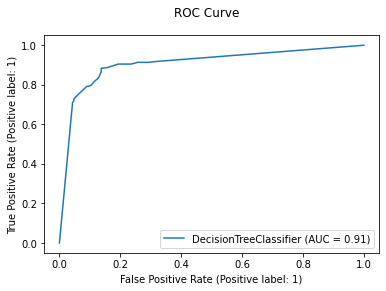

In [63]:
disp=metrics.plot_roc_curve(final_sel_model,X_test,y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Finally the model is giving  89% accuracy

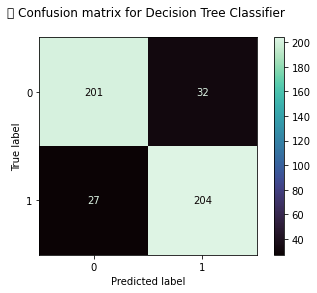

In [64]:
# Building confusion matrix

class_names=df.columns
metrics.plot_confusion_matrix(Classifier,X_test,y_test,cmap='mako')
plt.title('\t Confusion matrix for Decision Tree Classifier \n')
plt.show()

With the help of above confusion matrix we can understand that number of times model giving correct output and no of times model missing giving correct outpur(which are in black box)

# Saving best model

In [65]:
file_name = "final_sel_model.pkl"
joblib.dump(final_sel_model,file_name)

['final_sel_model.pkl']